<a href="https://colab.research.google.com/github/RileyWClarke/MLTSA_RClarke/blob/master/HW9/mltsa_hw9_rclarke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MLTSA - HW9 - Riley Clarke

In [0]:
from matplotlib import pyplot as plt
from matplotlib.colors import Normalize
import numpy as np
import pandas as pd
% matplotlib inline

In [2]:
from keras.models import Sequential
from keras.layers import Dense#, Dropout, Flatten
#from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


In [0]:
plt.style.use("https://raw.githubusercontent.com/fedhere/MLTSA_FBianco/master/fbb.mplstyle")

## Read in data

In [0]:
!pip install kaggle

In [4]:
from google.colab import drive

drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [5]:
cd gdrive/My\ Drive/

/content/gdrive/My Drive


In [6]:
ls kaggle.json

kaggle.json


In [0]:
!chmod 600 kaggle.json

In [0]:
import json
import os
envs = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']

In [9]:
!kaggle competitions list -s PLAsTiCC

ref            deadline             category   reward  teamCount  userHasEntered  
-------------  -------------------  --------  -------  ---------  --------------  
PLAsTiCC-2018  2018-12-17 23:59:00  Featured  $25,000       1094            True  


In [10]:
cd plasticc

/content/gdrive/My Drive/plasticc


In [11]:
cd data

/content/gdrive/My Drive/plasticc/data


In [0]:
#!kaggle competitions download PLAsTiCC-2018

test_set_batch7.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
test_set_batch11.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
training_set.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
test_set_batch5.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
data_note.pdf.zip: Skipping, found more recently modified local copy (use --force to force download)
test_set_batch3.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
test_set_batch2.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
training_set_metadata.csv: Skipping, found more recently modified local copy (use --force to force download)
test_set.csv.zip: Skipping, found more re

In [0]:
ls

allfeatures                test_set_batch2.csv.zip  test_set.csv.zip
allfeatures.npy            test_set_batch3.csv.zip  test_set_metadata.csv.zip
data_note.pdf.zip          test_set_batch4.csv.zip  test_set_sample.csv.zip
metadata                   test_set_batch5.csv.zip  training_set.csv
sample_submission.csv.zip  test_set_batch6.csv.zip  training_set.csv.zip
test_set_batch10.csv.zip   test_set_batch7.csv.zip  training_set_metadata.csv
test_set_batch11.csv.zip   test_set_batch8.csv.zip
test_set_batch1.csv.zip    test_set_batch9.csv.zip


In [0]:
!unzip training_set.csv.zip

Archive:  training_set.csv.zip
replace training_set.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: training_set.csv        


In [0]:
lcvs = pd.read_csv('training_set.csv')
lcvs.head()

,object_id,mjd,passband,flux,flux_err,detected
0,615,59750.4229,2,-544.810303,3.622952,1
1,615,59750.4306,1,-816.434326,5.553370,1
2,615,59750.4383,3,-471.385529,3.801213,1
3,615,59750.4450,4,-388.984985,11.395031,1
4,615,59752.4070,2,-681.858887,4.041204,1


In [0]:
starts = lcvs.groupby(["object_id"])[["mjd"]].min()
starts

,mjd
object_id,
615,59750.4229
713,59825.2600
730,59798.3205
745,59770.3662
1124,59750.4229
...,...
130739978,59790.3778
130755807,59581.3605
130762946,59620.2130


In [0]:
starts['mjd'].loc[starts.index == 615].values[0]

59750.4229

In [0]:
lcvs['object_id'].values[0]

615

Create new domain where each object is time indexed with its first observation being zero

In [0]:
#Very stupid and expensive way to do this:

mjd_new = np.zeros(lcvs.shape[0])

for i, obj in enumerate(lcvs['object_id'].values):

  if lcvs['mjd'][i] == starts['mjd'].loc[starts.index == obj].values[0]:
    pass

  else:
    mjd_new[i] = lcvs['mjd'][i] - starts['mjd'].loc[starts.index == obj]

 
mjd_new

array([0.000000e+00, 7.700000e-03, 1.540000e-02, ..., 8.606095e+02,
       8.755844e+02, 8.776242e+02])

In [0]:
lcvs['mjd_new'] = mjd_new
lcvs.head()

,object_id,mjd,passband,flux,flux_err,detected,mjd_new
0,615,59750.4229,2,-544.810303,3.622952,1,0.0000
1,615,59750.4306,1,-816.434326,5.553370,1,0.0077
2,615,59750.4383,3,-471.385529,3.801213,1,0.0154
3,615,59750.4450,4,-388.984985,11.395031,1,0.0221
4,615,59752.4070,2,-681.858887,4.041204,1,1.9841


In [0]:
lcvs.to_pickle('lcvs.pkl')

In [0]:
lcvs = pd.read_pickle('lcvs.pkl')

## Organize Data

In this section, we organize the data in the following ways:

-Split the dataframe according to passband, i.e. treat filters individually. 

-Each object has a different number of observations, so truncate each time series to have the same length as the shortest time series in that passband.

-Flatten each time series such that the result is a vector of timestamps with the corresponding flux values concatenated onto its end, e.g. t1|t2|t3|t4...f1|f2|f3|f4. This vector will be split into training and test data and fed to the autoencoder model.

In [13]:
lcvs_p4 = lcvs.loc[lcvs['passband'].values == 4]
lcvs_p4.head()

,object_id,mjd,passband,flux,flux_err,detected,mjd_new
3,615,59750.4450,4,-388.984985,11.395031,1,0.0221
7,615,59752.4334,4,-393.480225,3.599346,1,2.0105
12,615,59767.3233,4,-405.663818,3.496113,1,16.9004
17,615,59770.2445,4,-400.270386,3.834955,1,19.8216
22,615,59779.3452,4,-422.184509,4.089213,1,28.9223


Find length of shortest time series:

In [14]:
cnts = []

for obj in lcvs_p4['object_id'].unique():
  cnts.append(len(lcvs_p4.loc[lcvs_p4['object_id'].values == obj]))

np.min(cnts)

9

Passband 4 has the more observations than the other bands, so we'll use that sub-dataframe. 

Organize the data into the structure described above:

In [17]:
lp4_col = np.zeros((7848, 18))

for i, obj in enumerate(lcvs_p4['object_id'].unique()):
  for j in range(0,9):
    np.put(lp4_col[i][:], range(0,9), lcvs_p4['mjd_new'].loc[lcvs_p4['object_id'] == obj][0:9].values)
  for k in range(10,19):
    np.put(lp4_col[i][:], range(9,18), lcvs_p4['flux'].loc[lcvs_p4['object_id'] == obj][0:9].values)

lp4_col

array([[ 2.21000000e-02,  2.01050000e+00,  1.69004000e+01, ...,
         3.60397858e+02, -6.09423330e+01, -3.11977783e+02],
       [ 2.62000000e-02,  1.39822000e+01,  1.69650000e+01, ...,
         2.80503200e+00,  3.11723800e+00,  2.09971100e+00],
       [ 2.61000000e-02,  3.06100000e+00,  2.80162000e+01, ...,
         9.56947000e-01,  2.51195000e-01, -7.39414000e-01],
       ...,
       [ 3.17340000e+00,  4.16920000e+00,  6.16800000e+00, ...,
        -4.04133680e+01, -1.71885190e+01, -4.28879810e+01],
       [ 7.97080000e+00,  1.50129000e+01,  4.39131000e+01, ...,
         3.42011000e+00,  7.43219900e+00, -4.04799900e+00],
       [ 1.18958000e+01,  1.80183000e+01,  5.87269000e+01, ...,
         5.49828750e+04,  3.04264795e+03,  1.99136682e+03]])

In [18]:
lp4_col.shape

(7848, 18)

In [19]:
N = lp4_col.shape[1]
N

18

In [0]:
from sklearn.model_selection import train_test_split
X_tr,  X_te, y_tr, y_te = train_test_split(lp4_col, lp4_col, 
                                             test_size = .25, random_state=1)

In [21]:
X_tr.shape, X_te.shape, y_tr.shape, y_te.shape

((5886, 18), (1962, 18), (5886, 18), (1962, 18))

Create the autoencoder model. This model will have a 128 neuron bottleneck. This is still a classification problem, so I decided to keep the mean squared error loss function. It is more commonly used in regression but works in classification problems as well. The example notebook uses 'relu' activation functions in conjunction with the MSE loss function so should work here as well. I decided to use the adagrad optimizer because it's allegedly well suited to sparse data, which is certainly the case for these time series.

In [0]:
def create_model(bottleneck=128, input_dim=18):
  model = Sequential()
  model.add(Dense(256, activation='relu', input_dim=input_dim))
  model.add(Dense(128, activation='relu', name="bottleneck"))
  model.add(Dense(256, activation='relu'))
  model.add(Dense(input_dim, activation='relu'))
  #model.add(Dense(input_dim*4, activation='sigmoid'))
  model.compile(optimizer='adagrad', loss='mse',
              metrics=['mae', 'acc'])
  return model
model = create_model(input_dim=N)

In [54]:
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 256)               4864      
_________________________________________________________________
bottleneck (Dense)           (None, 128)               32896     
_________________________________________________________________
dense_20 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_21 (Dense)             (None, 18)                4626      
Total params: 75,410
Trainable params: 75,410
Non-trainable params: 0
_________________________________________________________________
None


Train the model. I decided to run only 1000 epochs because my computer kept crashing after ~2500. This is probably too few epochs to train the autoencoder effectively. Because the timeseries are so small, overfitting is a problem, so I decided not to decrease the batch size. 

In [55]:
history = model.fit(X_tr, y_tr, epochs=1000, batch_size=16, verbose=1)

Epoch 1/1000
5886/5886 [==============================] - 1s 118us/step - loss: 1030560.4075 - mae: 83.3196 - acc: 0.8445
Epoch 2/1000
5886/5886 [==============================] - 1s 101us/step - loss: 1998356.7360 - mae: 83.1040 - acc: 0.8772
Epoch 3/1000
5886/5886 [==============================] - 1s 96us/step - loss: 3258908.4472 - mae: 85.4186 - acc: 0.8872
Epoch 4/1000
5886/5886 [==============================] - 1s 96us/step - loss: 3837532.2488 - mae: 88.7593 - acc: 0.7581
Epoch 5/1000
5886/5886 [==============================] - 1s 95us/step - loss: 3654744.3573 - mae: 80.2856 - acc: 0.7576
Epoch 6/1000
5886/5886 [==============================] - 1s 97us/step - loss: 1783810.0543 - mae: 72.4105 - acc: 0.8775
Epoch 7/1000
5886/5886 [==============================] - 1s 98us/step - loss: 627449.8052 - mae: 67.6218 - acc: 0.8721
Epoch 8/1000
5886/5886 [==============================] - 1s 99us/step - loss: 617050.4229 - mae: 65.6769 - acc: 0.8437
Epoch 9/1000
5886/5886 [========

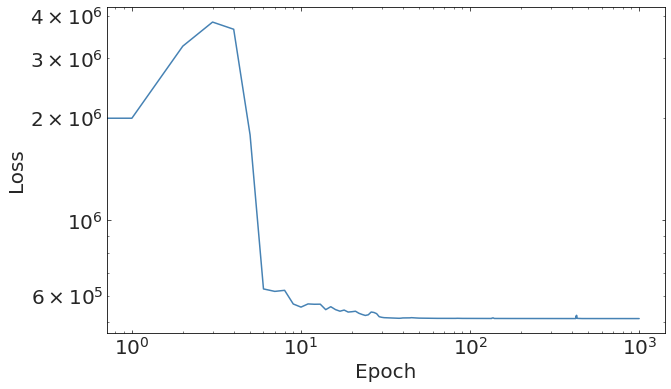

In [56]:
plt.plot(np.array(history.history['loss']))
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Epoch')
plt.ylabel('Loss');

Figure 1: Loss function of the autoencoder model. The loss function does decrease and the decrease in the loss function appears to flatten out after ~1000 epochs. However, the loss remains quite high, on the order of $10^5$.

## Predict

Output of the autoencoder is structured in the same way as the input data, i.e. t1|t2|t3|t4...f1|f2|f3|f4

In [57]:
output = model.predict(X_te)
output

array([[  0.        ,  18.695015  ,   0.        , ..., 375.65253   ,
        234.95253   , 148.73705   ],
       [  0.        ,  19.828758  ,   0.        , ...,  15.608765  ,
          0.        ,  21.437761  ],
       [  0.        ,   2.5704675 ,   0.        , ...,   0.        ,
          0.66665703,   0.49534827],
       ...,
       [  0.        ,  17.370955  ,   0.        , ..., 110.15807   ,
         81.99013   ,  52.184433  ],
       [  0.        ,  58.641304  ,   0.        , ...,  47.96092   ,
         14.506378  ,   0.        ],
       [  0.        ,  13.374206  ,   0.        , ...,   0.        ,
          0.        ,   8.759291  ]], dtype=float32)

Compare output to original timeseries:

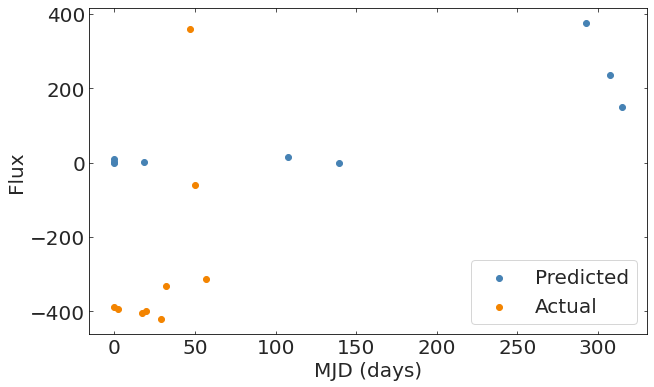

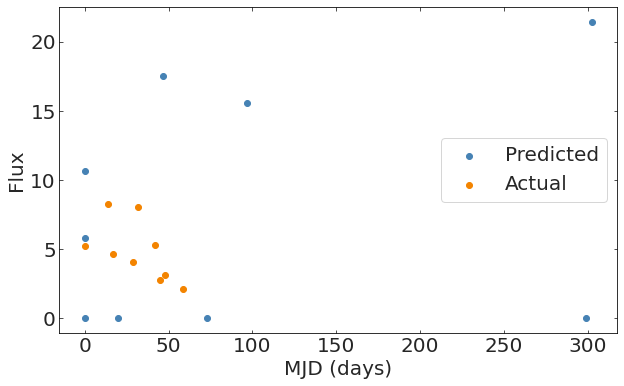

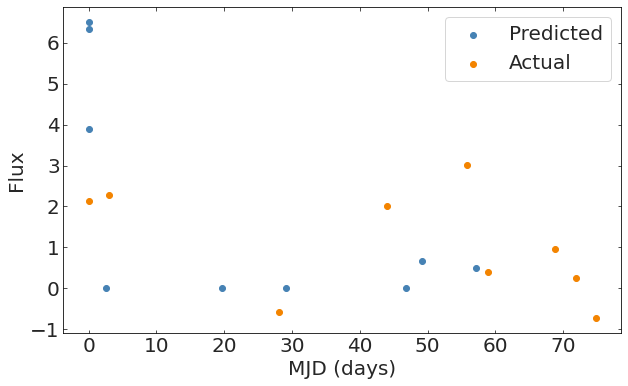

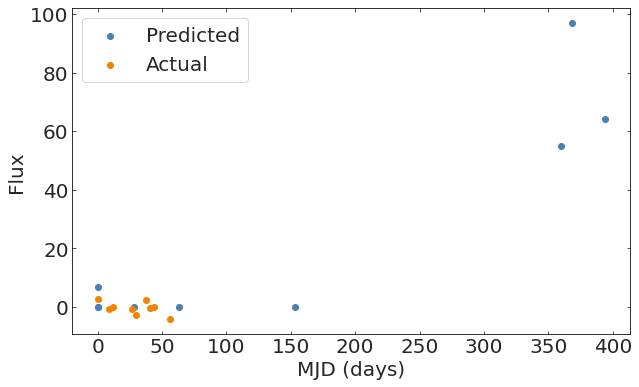

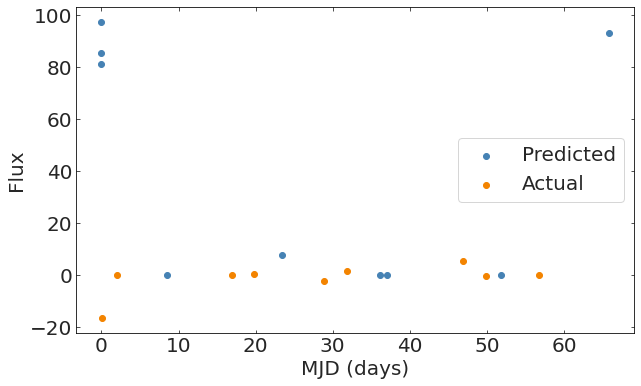

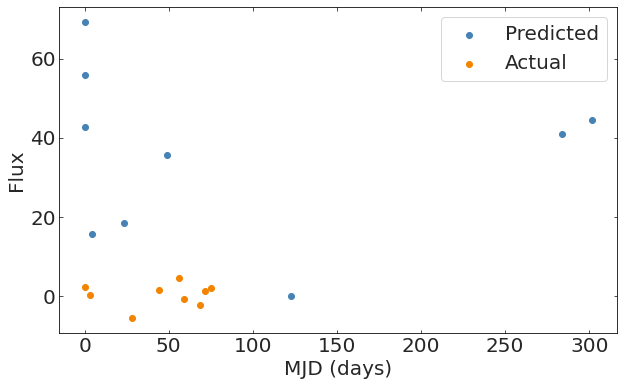

In [58]:
for i in range(6):
  plt.scatter(output[i][0:9], output[i][9:18], label='Predicted')
  plt.scatter(lp4_col[i][0:9], lp4_col[i][9:18], label='Actual')
  plt.xlabel('MJD (days)')
  plt.ylabel('Flux')
  plt.legend()
  plt.show()

Figure 2: Comparing the first 5 datasets predicted by the autoencoder to the actual time series. Given the loss function, its unsuprising the predicted data appears nothing like the actual.